## Definição da formulação forte

Dada uma função $f:[0,1]\rightarrow\mathbb{R}$ e constantes reais $\alpha>0$, $\beta\geq 0$, $\gamma\geq 0$ determine $u:[0,1]\rightarrow\mathbb{R}$ tal que

\begin{align*}
\left\{
\begin{aligned}
&-\alpha u_{xx}(x) + \beta u(x) + \gamma u_x(x) = f(x),\quad x\in]0,1[,
\\
&u(0)=u(1)=0.
\end{aligned}\right.
\end{align*}

### Transição entre a formulação forte e fraca
Dada uma função $f$ e constantes reais $\alpha$, $\beta$ e $\gamma$, podemos chegar na formulação que utilizaremos inicialmente ao multiplicar a formulação forte por $v \in V$ (i.e. $v$ pertence ao espaço das funções teste $V$) e aplicando a integração no intervalo de 0 a 1.

\begin{align*}
  \alpha \int_0^1\frac{d^2u}{dx^2}(x) v(x)dx
+ \beta  \int_0^1 u(x)v(x)dx
+ \gamma \int_0^1 \frac{du}{dx}(x)v(x)dx
= \int_0^1f(x)v(x)dx,
\quad \forall v\in V.
\end{align*}


## Definição da formulação fraca

Dada a formulação forte e sua forma intermediária utilizando integral, podemos obter a formualação fraca realizando a integração por partes na parcela que multiplica $\alpha$ para reduzir a ordem da derivada


\begin{align*}
  \alpha \int_0^1\frac{du}{dx}(x)\frac{dv}{dx}(x)dx
+ \beta  \int_0^1 u(x)v(x)dx
+ \gamma \int_0^1 \frac{du}{dx}(x)v(x)dx
= \int_0^1f(x)v(x)dx,
\quad \forall v\in V.
\end{align*}

Vamos reescrever a equação acima utilizando dois operadores

\begin{align*}
\kappa:V\times V\rightarrow\mathbb{R},\;(u,v)\mapsto \kappa(u,v)=
  \alpha \int_0^1\frac{du}{dx}(x)\frac{dv}{dx}(x)dx
+ \beta  \int_0^1 u(x)v(x)dx
+ \gamma \int_0^1 \frac{du}{dx}(x)v(x)dx.
\end{align*}

\begin{align*}
(f,v) = \int_0^1 f(x) v(x)dx.
\end{align*}

Dessa forma temos

\begin{align*}
\kappa(u,v) = (f,v),
\quad \forall v\in V.
\end{align*}

In [14]:
using LinearAlgebra
using SparseArrays
using GaussQuadrature
using DataFrames
using Plots

### Exemplos de solução exata para o problema acima:


In [15]:
function Exemplo1()
    alpha = 1.0 
    beta = 1.0
    gamma = 1.0
    f(x) = (alpha*π^2 + beta) * sin(π*x) + gamma * π * cos(π*x)
    u(x) = sin(π*x)
    return alpha, beta, gamma, f, u
end

function Exemplo2()
    alpha = 1.0 
    beta = 0.0
    gamma = 0.0
    f(x) = 8.0
    u(x) = -4.0 * x * (x - 1.0)
    return alpha, beta, gamma, f, u
end

"Retorna os valores de `alpha`, `beta`, `f` e `u` de acordo com o exemplo escolhido."
function dados_de_entrada(exemplo::Int)
    if exemplo == 1
        return Exemplo1()
    elseif exemplo == 2
        return Exemplo2()
    else
        error("Exemplo inválido. Escolha 1, 2, 3 ou 4.")
    end
end
     

dados_de_entrada

## Aplicando o método de Galerkin


Dada uma função $f:[0,1]\rightarrow\mathbb{R}$ e constantes reais $\alpha>0$, $\beta>0$, e $\gamma\geq 0$, determine $u_h\in V_m=[\varphi_1,\varphi_2,\dots,\varphi_{m}]$ tal que

\begin{align*}
K_{i,j} = 
  \alpha \int_0^1\frac{d\varphi_i}{dx}(x)\frac{d\varphi_j}{dx}(x)dx
+ \beta  \int_0^1 \varphi_i(x)\varphi_j(x)dx
+ \gamma \int_0^1 \frac{\varphi_j}{dx}(x)\varphi_i(x)dx
\quad\text{e}\quad
F_i = 
\int_0^1f(x)\varphi_i(x)dx.
\end{align*}

Lembrando que

\begin{align*}
  \kappa(u_h,v_h)
= (f,v_h),
\quad \forall v_h\in V_m.
\end{align*}


### Transição entre o problema aproximado e sua forma matriz-vetor

A formulação matricial é dada por $\displaystyle u_h(x) = \sum_{j=1}^{m} c_j\varphi_j(x)$ para $i=1,2,\dots,m$. Do sistema resultante obtemos:

\begin{align*}
\left\{
\begin{aligned}
& \kappa\big(\sum_{j=1}^mc_j\varphi_j,\varphi_1 \big) = (f,\varphi_1), 
\\
& \kappa\big(\sum_{j=1}^mc_j\varphi_j,\varphi_2 \big) = (f,\varphi_2),
\\
& \kappa\big(\sum_{j=1}^mc_j\varphi_j,\varphi_3 \big) = (f,\varphi_3),
\\
& \vdots
\\
& \kappa\big(\sum_{j=1}^mc_j\varphi_j,\varphi_m \big) = (f,\varphi_m).
\end{aligned}\right.
\end{align*}

Com isso, dado que o operador k é linear em cada componente, temos:

\begin{align*}
\left\{
\begin{aligned}
& \kappa\big(\varphi_1,\varphi_1\big)c_1 + \kappa\big(\varphi_2,\varphi_1\big)c_2 + \kappa\big(\varphi_3,\varphi_1\big)c_3 + \dots + \kappa\big(\varphi_m,\varphi_1\big)c_m = (f,\varphi_1), 
\\
& \kappa\big(\varphi_1,\varphi_2\big)c_1 + \kappa\big(\varphi_2,\varphi_2\big)c_2 + \kappa\big(\varphi_3,\varphi_2\big)c_3 + \dots + \kappa\big(\varphi_m,\varphi_2\big)c_m = (f,\varphi_2), 
\\
& \kappa\big(\varphi_1,\varphi_3\big)c_1 + \kappa\big(\varphi_2,\varphi_3\big)c_2 + \kappa\big(\varphi_3,\varphi_3\big)c_3 + \dots + \kappa\big(\varphi_m,\varphi_3\big)c_m = (f,\varphi_3), 
\\
& \vdots
\\
& \kappa\big(\varphi_1,\varphi_m\big)c_1 + \kappa\big(\varphi_2,\varphi_m\big)c_2 + \kappa\big(\varphi_3,\varphi_m\big)c_3 + \dots + \kappa\big(\varphi_m,\varphi_m\big)c_m = (f,\varphi_m).
\end{aligned}\right.
\end{align*}

## Definição da forma matriz-vetor do problema aproximado
Dai podemos transfomar na forma de matrizes

\begin{align*}
\begin{bmatrix}
\kappa\big(\varphi_1,\varphi_1\big)&\kappa\big(\varphi_2,\varphi_1\big)&\kappa\big(\varphi_3,\varphi_1\big)&\dots&\kappa\big(\varphi_m,\varphi_1\big)\\
\kappa\big(\varphi_1,\varphi_2\big)&\kappa\big(\varphi_2,\varphi_2\big)&\kappa\big(\varphi_3,\varphi_2\big)&\dots&\kappa\big(\varphi_m,\varphi_2\big)\\
\kappa\big(\varphi_1,\varphi_3\big)&\kappa\big(\varphi_2,\varphi_3\big)&\kappa\big(\varphi_3,\varphi_3\big)&\dots&\kappa\big(\varphi_m,\varphi_3\big)\\
\vdots&\vdots&\vdots&\ddots& \vdots  \\
\kappa\big(\varphi_1,\varphi_m\big)&\kappa\big(\varphi_2,\varphi_m\big)&\kappa\big(\varphi_3,\varphi_m\big)&\dots&\kappa\big(\varphi_m,\varphi_m\big)\\
\end{bmatrix}
\begin{bmatrix}
c_1\\
c_2\\
c_3\\
\vdots\\
c_m
\end{bmatrix}
=
\begin{bmatrix}
(f,\varphi_1)\\
(f,\varphi_2)\\
(f,\varphi_3)\\
\vdots\\
(f,\varphi_m)\\
\end{bmatrix}.
\end{align*}


In [16]:
"""
Mapeia um ponto `psi` do intervalo padrão `[-1, 1]` para o intervalo físico
"""
function X(x::Float64, h::Float64, x1e::Float64)
    return (x + 1.0) * h / 2.0 + x1e
end

function phi(psi::Float64, a::Int)
    if a == 1
        return (1.0 - psi) / 2.0
    elseif a == 2
        return (1.0 + psi) / 2.0
    else
        error("a deve ser 1 ou 2.")
    end
end

function d_phi(psi::Float64, a::Int)
    if a == 1
        return -1.0 / 2.0
    elseif a == 2
        return 1.0 / 2.0
    else
        error("a deve ser 1 ou 2.")
    end
end



d_phi (generic function with 1 method)

## Calculo das matrizes LG e EQ a partir do número de elementos

A matriz $LG$ armazena a correspondência entre a nomenclatura local e global de cada elemento finito. Assim, ela possui $n_e$ colunas, cada uma relativa a um elemento finito.

\begin{align*}
LG(a,e) = 
\begin{cases}
e,&\quad\text{se } a=1,
\\ 
e+1,&\quad\text{se } a=2.
\end{cases}
\end{align*}

Dessa forma, a matriz $LG$ é dada por
\begin{align*}
LG = 
\begin{bmatrix}
1 & 2 & \dots & e-1 & e   & \dots & n_e  \\
2 & 3 & \dots & e   & e+1 & \dots & n_e+1\\
\end{bmatrix}_{2\times n_e}.
\end{align*}

 Cada entrada do vetor $EQ$ possui a nova numeração de uma função global. Portanto, o tamanho do vetor $EQ$
 é dado pelo número de funções globais, ou seja, $n_e + 1$.

\begin{align*}
EQ = 
\begin{bmatrix}
m+1 & 1 & 2 &\dots & m & m+1 
\end{bmatrix}_{(n_e+1)}
\end{align*}

In [17]:
function make_LG(ne::Int) :: Matrix{Int}
    return transpose(hcat(1:ne, 2:ne+1))
end

function make_EQ(ne::Int) :: Tuple{Int,Vector{Int}}
    m = ne - 1         
    EQ = vcat(m+1,1:m,m+1)
    return m, EQ
end

make_EQ (generic function with 1 method)

### Cálculo da matriz local $K^e$ - via quadratura gaussia

\begin{align*}
K^e_{a,b} 
& = 
  \alpha \int_{x_{1}^e}^{x_2^e}\frac{d\varphi_a^e}{dx}(x)\frac{d\varphi_b^e}{dx}(x)dx
+ \beta  \int_{x_{1}^e}^{x_2^e}\varphi_a^e(x)\varphi_b^e(x)dx
\\[5pt]
K^e_{a,b} 
& =
\alpha \int_{-1}^{1}
\frac{d\varphi_a^e}{dx}\big(x(\xi,e)\big)\frac{d\varphi_b^e}{dx}\big(x(\xi,e)\big)\frac{h}{2} d\xi
+ \beta  \int_{-1}^{1}
\varphi_a^e\big(x(\xi,e)\big)\varphi_b^e\big(x(\xi,e)\big)\frac{h}{2} d\xi
\\[5pt]
K^e_{a,b} 
& =
\alpha \int_{-1}^{1}
\frac{d\phi_a}{d\xi}(\xi)\frac{2}{h}\frac{d\phi_b}{d\xi}(\xi)\frac{2}{h}\frac{h}{2} d\xi
+ \beta  \int_{-1}^{1}
\phi_a(\xi)\phi_b(\xi)\frac{h}{2} d\xi
\\[5pt]
K^e_{a,b} 
& =
\frac{2\alpha}{h} \int_{-1}^{1}
\frac{d\phi_a}{d\xi}(\xi)\frac{d\phi_b}{d\xi}(\xi)d\xi
+ \frac{\beta h}{2}  \int_{-1}^{1}
\phi_a(\xi)\phi_b(\xi) d\xi
\\[5pt]
K^e_{a,b} 
& =
\frac{2\alpha}{h} \sum_{j=1}^{n_{pg}} W_j \frac{d\phi_a}{d\xi}(P_j)\frac{d\phi_b}{d\xi}(P_j)
+ \frac{\beta h}{2} \sum_{j=1}^{n_{pg}} W_j \phi_a(P_j)\phi_b(P_j).
\end{align*}

In [18]:

function make_Ke(alfa::Float64, beta::Float64, gamma::Float64, h::Float64, npg::Int=2)
    P, W = legendre(npg)
    K = zeros(2, 2)
    c1 = 2*alfa/h
    c2 = beta*h/2

    for a in 1:2
        for b in 1:2
            for j in 1:npg
                K[a, b] += W[j] * (d_phi(P[j], a) * d_phi(P[j], b) * c1 + phi(P[j], a) * phi(P[j], b) * c2)+ gamma * d_phi(P[j], b) * phi(P[j], a)
            end
        end
    end

    return K
end

make_Ke (generic function with 2 methods)

### Montagem da matriz global K a partir da matriz local $K^e$

In [19]:
function make_K(alfa::Float64, beta::Float64, gamma::Float64, ne::Int, m::Int, EQoLG::Matrix{Int})
    h = 1.0 / ne
    K = spzeros(m+1, m+1)
    Ke = make_Ke(alfa, beta, gamma, h)

    for e in 1:ne
        for a in 1:2
            i = EQoLG[a, e]
            for b in 1:2
                K[i, EQoLG[b, e]] += Ke[a, b]
            end
        end
    end

    return K[1:m, 1:m]
end

make_K (generic function with 1 method)

### Cálculo do vetor local $F^e$ - via quadratura gaussiana

\begin{align*}
F_a^e 
 = 
\int_{x_1^e}^{x_2^e}f(x)\varphi_a^e(x)dx
 =
\int_{-1}^{1}f\big(x(\xi,e)\big)\varphi_a^e\big(x(\xi,e)\big)\frac{h}{2}d\xi
 =
\frac{h}{2} \int_{-1}^{1}f\big(x(\xi,e)\big)\phi_a(\xi)d\xi
 \approx
\frac{h}{2} \sum_{j=1}^{n_{pg}} W_j f\big(x(P_j,e)\big)\phi_a(P_j).
\end{align*}

In [20]:
function make_Fe(f::Function, h::Float64, xle::Float64, P::Vector{Float64}, W::Vector{Float64}, npg::Int=5)
    Fe = zeros(2)     
    for a in 1:2
        for j = 1:npg
            x = X(P[j], h, xle)
            Fe[a] += W[j] * f(x) * phi(P[j], a) * h/2
        end
    end
    
    return Fe
end

make_Fe (generic function with 2 methods)

### Montagem do vetor global F a partir do vetor local $F^e$


In [21]:
function make_F(f::Function, ne::Int, m::Int, EQoLG::Matrix{Int}, npg::Int=5)
    h = 1.0 / ne
    F = zeros(m + 1)
    P, W = legendre(npg)
    
    for e in 1:ne
        Fe = make_Fe(f, h, (e-1)*h, P, W, npg)
        for a = 1:2
            F[EQoLG[a, e]] += Fe[a]
        end
    end
    
    return F[1:m]
end

make_F (generic function with 2 methods)

### Cálculo do erro na norma L2 utilizando quadratura gaussiana

In [22]:
function erro_norma_L2(u::Function, c::Vector{Float64}, ne::Int, EQoLG::Matrix{Int})
    h = 1.0 / ne       
    erro = 0.0         
    P, W = legendre(5) 

    phi_1P = phi.(P, 1)
    phi_2P = phi.(P, 2)

    for e = 1:ne
        c1e = c[EQoLG[1,e]]
        c2e = c[EQoLG[2,e]]

        for j = 1:length(P)
            x = X(P[j], h, (e-1)*h) 
            erro += W[j] * (u(x) - c1e*phi_1P[j] - c2e*phi_2P[j])^2
        end
    end

    return sqrt(erro*h/2)
end

erro_norma_L2 (generic function with 1 method)

### Comparando a solução aproximada com a solução exata


In [23]:
function show_solution(case::Int)
    alfa, beta, gamma, f, u = dados_de_entrada(case)
    npg = 5
    # Define o número de elementos em que o domínio [0,1] é dividido
    ne = 4
    
    # Define a matriz LG
    LG = make_LG(ne)
    
    # Define a dimensão do espaço aproximado Vₘ e o vetor EQ
    m, EQ = make_EQ(ne)
    
    # Define a matriz EQoLG
    EQoLG = EQ[LG]
    
    # Exibe os valores ne, LG, m, EQ e EQoLG
    display("ne = "); display(ne)
    display("LG = "); display(LG)
    display("m = "); display(m)
    display("EQ = "); display(EQ)
    display("EQoLG = "); display(EQoLG)
    
    
    # Constrói a matriz K e o vetor F
    K = make_K(alfa, beta, gamma, ne, m, EQoLG)
    F = make_F(f, ne, m, EQoLG, npg)
    
    # Exibe a matriz K (sistema linear) e o vetor F (vetor força)
    display("Matriz K:")
    display(K)
    display("Vetor F:")
    display(F)
    
    # Resolve o sistema linear K * c = F para obter os coeficientes solução aproximada u_h(x)
    c = K \ F
    display("Solução aproximada U:")
    display(c)
    
    # Exibe a solução exata nos nos internos da malha
    display("Solução exata nos nós internos:")
    h = 1.0 / ne  # Comprimento de cada elemento finito
    display(u.(h:h:1-h))
    
    # Define a discretização da malha com N nós internos, incluindo os pontos de fronteira
    malha = 0:h:1
    
    # Gera o gráfico comparando a solução aproximada com a solução exata
    plt1 = plot(0:0.01:1, u.(0:0.01:1), label="Exata", lw=3, title="Comparação: Solução Exata vs. Aproximada")
    plot!(plt1, malha, [0; c; 0], label="Aproximada", lw=3, linestyle=:solid, markershape=:circle) # O "!" adiciona ao gráfico existente
    xlabel!("x")  # Adiciona o rótulo ao eixo x
    
    # Exibe o gráfico final
    display(plt1) 
end

show_solution (generic function with 1 method)

### Estudo de convergência do erro.

In [24]:
function show_error(case::Int)
    alfa, beta, gamma, f, u = dados_de_entrada(case)

    npg = 5

    P, W = legendre(npg)

    errors = zeros(9)
    vec_h = zeros(9)

    for p in 2:10
        ne = 2^p - 1
        h = 1.0 / ne
        vec_h[p-1] = h

        LG = make_LG(ne)
        m, EQ = make_EQ(ne)
        EQoLG = EQ[LG]

        K = make_K(alfa, beta, gamma, ne, m, EQoLG)
        F = make_F(f, ne, m, EQoLG, npg)

        c = K \ F

        errors[p-1] = erro_norma_L2(u, [c;0], ne, EQoLG)
    end


    # Gera o gráfico comparando a solução aproximada com a solução exata
    plt2 = Plots.plot(vec_h, errors, yscale=:log10, xscale=:log10, label="Errors", xlabel="h", ylabel="Erro", title="Erros na solução do problema")
    plot!(plt2, vec_h, vec_h.^2, yscale=:log10, xscale=:log10, legend=:topleft, label="h^2", xlabel="h", ylabel="Erro")
    xlabel!("x")  # Adiciona o rótulo ao eixo x

    # Exibe o gráfico final
    display(plt2)
end

show_error (generic function with 1 method)

"ne = "

4

"LG = "

2×4 Matrix{Int64}:
 1  2  3  4
 2  3  4  5

"m = "

3

"EQ = "

5-element Vector{Int64}:
 4
 1
 2
 3
 4

"EQoLG = "

2×4 Matrix{Int64}:
 4  1  2  3
 1  2  3  4

"Matriz K:"

3×3 SparseMatrixCSC{Float64, Int64} with 7 stored entries:
  8.16667  -3.45833    ⋅ 
 -4.45833   8.16667  -3.45833
   ⋅       -4.45833   8.16667

"Vetor F:"

3-element Vector{Float64}:
 2.352121770752068
 2.5805560513947237
 1.2973355955943129

"Solução aproximada U:"

3-element Vector{Float64}:
 0.7137289051760546
 1.0053005170657479
 0.7076694368382578

"Solução exata nos nós internos:"

3-element Vector{Float64}:
 0.7071067811865475
 1.0
 0.7071067811865476

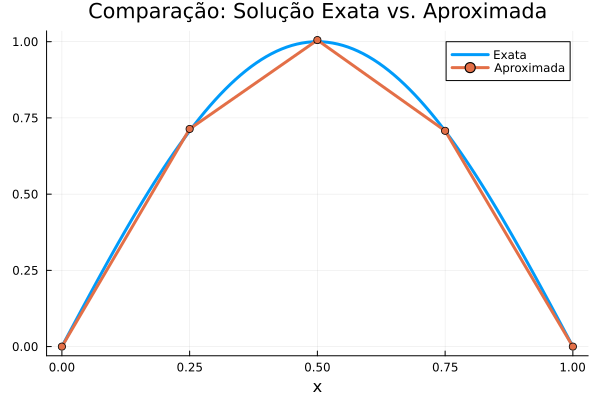

In [25]:
case = 1
show_solution(case)

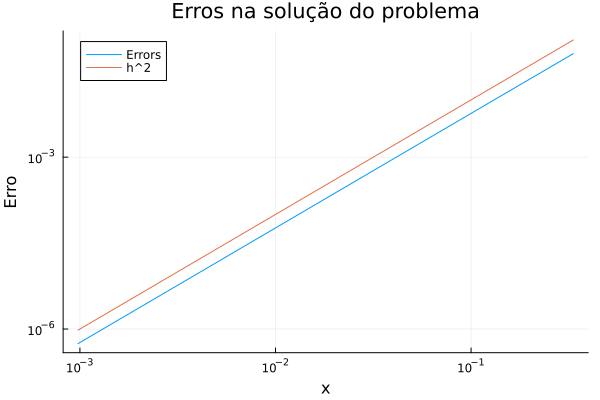

In [26]:
case = 1
show_error(case)